In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import Transformation
import DataCleaning
import ErrorVis

In [2]:
allBitcoinData = DataCleaning.getBitcoinData()

/Users/shivasaravanan/CryptoDataFull/DataCleaning.py:205: DtypeWarning: Columns (83,87,88,91) have mixed types. Specify dtype option on import or set low_memory=False.
  bitcoinPosts = pd.read_csv("bitcoin_posts.csv")[["normal_date", "one"]]
/Users/shivasaravanan/CryptoDataFull/DataCleaning.py:221: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoinModTrends["DayTime"] = pd.to_datetime(bitcoinModTrends["Day"])
/Users/shivasaravanan/CryptoDataFull/DataCleaning.py:17: DtypeWarning: Columns (83,84) have mixed types. Specify dtype option on import or set low_memory=False.
  allPosts1 = pd.read_csv("allcrypto_postsToEnd2020.csv")[["normal_date", "one"]]
/Users/shivasaravanan/CryptoDataFull/DataCleaning.py:18: DtypeWarning: Columns (82,84,86,87,88) h

Index(['allPosts'], dtype='object')


/Users/shivasaravanan/CryptoDataFull/DataCleaning.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allModTrends["DayTime"] = pd.to_datetime(allModTrends["Day"])


(0.0, 70438.59370115)

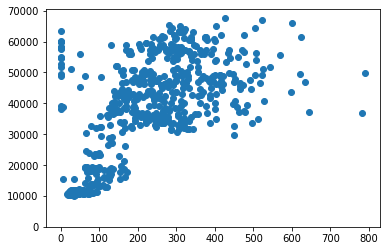

In [3]:
plt.scatter(allBitcoinData["one"], allBitcoinData["Close"])
plt.ylim(ymin=0)

(0.0, 70438.59370115)

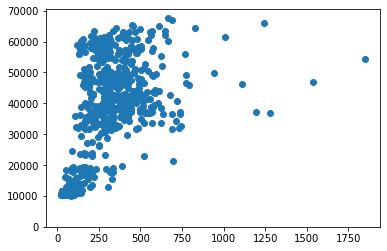

In [4]:
plt.scatter(allBitcoinData["tweet_count"], allBitcoinData["Close"])
plt.ylim(ymin=0)

(0.0, 70438.59370115)

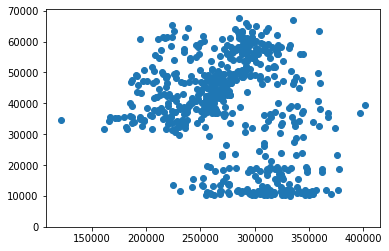

In [5]:
plt.scatter(allBitcoinData["transaction_count"], allBitcoinData["Close"])
plt.ylim(ymin=0)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing as prep
import statsmodels.api as sm

In [7]:
allBitcoinData["normalized_tweets"] =100 * (allBitcoinData["tweet_count"])/(allBitcoinData["tweet_count"].max())

In [8]:
allBitcoinData["normalized_posts"] = 100*(allBitcoinData["one"])/(allBitcoinData["one"].max())
allBitcoinData["normalized_sum"] = (allBitcoinData["normalized_tweets"] + allBitcoinData["normalized_posts"])/2 

In [9]:
allBitcoinData["normalized_txs"] = 100 * (allBitcoinData["transaction_count"])/(allBitcoinData["transaction_count"].max())
allBitcoinData["normalized_price"] = 100 * (allBitcoinData["Close"])/(allBitcoinData["Close"].max())

Text(0, 0.5, 'Price')

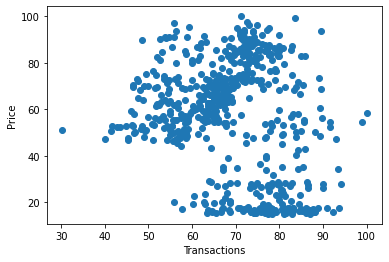

In [10]:
plt.scatter(allBitcoinData["normalized_txs"], allBitcoinData["normalized_price"])
plt.xlabel("Transactions")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

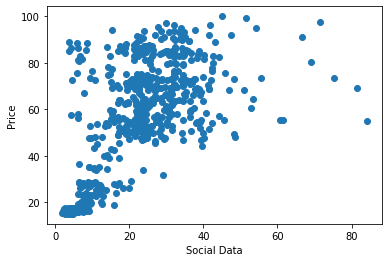

In [11]:
plt.scatter(allBitcoinData["normalized_sum"], allBitcoinData["normalized_price"])
plt.xlabel("Social Data")
plt.ylabel("Price")

In [12]:
allBitcoinData[["standardized_txs", "standardized_tweets", "standardized_posts", "standardized_trends"]] = prep.StandardScaler().fit_transform(allBitcoinData[['transaction_count', 'tweet_count', 'one', "Bitcoin"]])
allBitcoinData["standardized_social"] = (allBitcoinData["standardized_tweets"] + allBitcoinData["standardized_posts"] + allBitcoinData["standardized_trends"])/3
allBitcoinData["standardized_price"] = prep.StandardScaler().fit_transform(allBitcoinData[["Close"]])
X = sm.add_constant(allBitcoinData[["standardized_txs", "standardized_posts", "standardized_tweets", "standardized_trends"]])
Y = allBitcoinData["standardized_price"]

model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     standardized_price   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     111.0
Date:                Thu, 19 May 2022   Prob (F-statistic):           5.86e-70
Time:                        16:42:04   Log-Likelihood:                -651.62
No. Observations:                 576   AIC:                             1313.
Df Residuals:                     571   BIC:                             1335.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4.424e-17    

Text(0, 0.5, 'closing price')

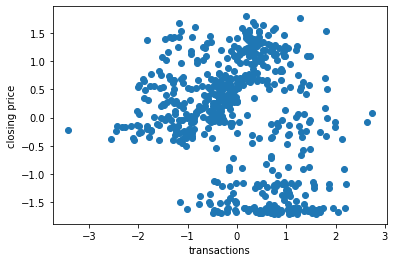

In [13]:
plt.scatter(allBitcoinData["standardized_txs"], allBitcoinData["standardized_price"])
plt.xlabel("transactions")
plt.ylabel("closing price")

Text(0, 0.5, 'closing price')

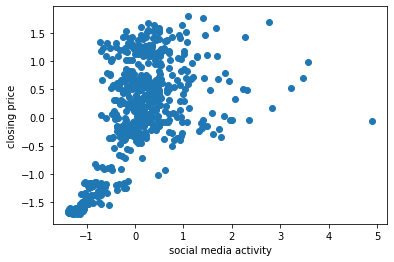

In [14]:
plt.scatter(allBitcoinData["standardized_social"], allBitcoinData["standardized_price"])
plt.xlabel("social media activity")
plt.ylabel("closing price")

In [15]:
import statsmodels.stats as st
import statsmodels.tools as stools
print(st.diagnostic.linear_harvey_collier(model))

Ttest_1sampResult(statistic=nan, pvalue=nan)


In [16]:
modelRobust = sm.RLM(Y, X).fit()
print(modelRobust.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:     standardized_price   No. Observations:                  576
Model:                            RLM   Df Residuals:                      571
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 19 May 2022                                         
Time:                        16:42:05                                         
No. Iterations:                    35                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0140    

In [17]:
print(st.diagnostic.linear_harvey_collier(modelRobust))

Ttest_1sampResult(statistic=nan, pvalue=nan)


In [18]:
print(st.diagnostic.linear_rainbow(model))

(2.7390886145574966, 4.289395878405673e-17)


eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


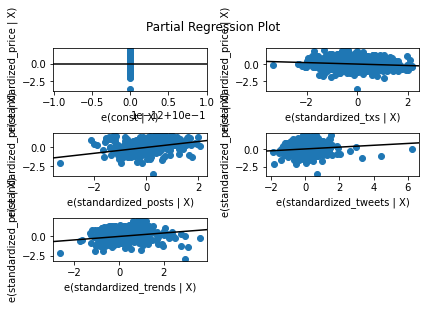

In [19]:
fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1.0)

eval_env: 1


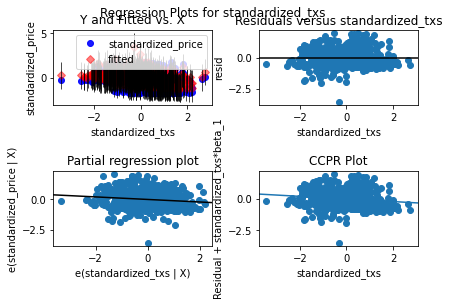

In [20]:
fig2 = sm.graphics.plot_regress_exog(model, 'standardized_txs')

In [21]:
import numpy as np

In [22]:
import statsmodels

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


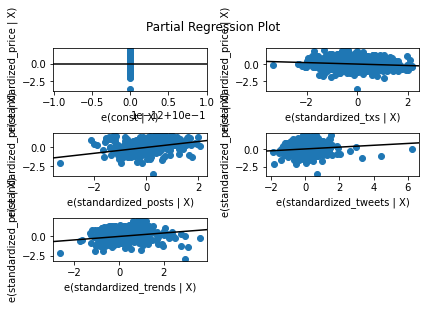

In [23]:
fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1.0)

In [24]:
allBitcoinData["txnsSq"] = allBitcoinData["standardized_txs"]*allBitcoinData["standardized_txs"]
allBitcoinData["smSq"] = allBitcoinData["standardized_social"]*allBitcoinData["standardized_social"]
allBitcoinData["trendSq"] = allBitcoinData["standardized_trends"]*allBitcoinData["standardized_trends"]
allBitcoinData["postsSq"] = allBitcoinData["standardized_posts"]*allBitcoinData["standardized_posts"]
allBitcoinData["twtSq"] = allBitcoinData["standardized_tweets"]*allBitcoinData["standardized_tweets"]
XQuadratic = sm.add_constant(allBitcoinData[["standardized_txs", "standardized_posts", "standardized_trends","txnsSq","postsSq", "trendSq"]])

modelQuadratic = sm.OLS(Y, XQuadratic).fit()
print(modelQuadratic.summary())

                            OLS Regression Results                            
Dep. Variable:     standardized_price   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     152.1
Date:                Thu, 19 May 2022   Prob (F-statistic):          9.01e-115
Time:                        16:42:08   Log-Likelihood:                -541.71
No. Observations:                 576   AIC:                             1097.
Df Residuals:                     569   BIC:                             1128.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3779    

Text(0, 0.5, 'closing price')

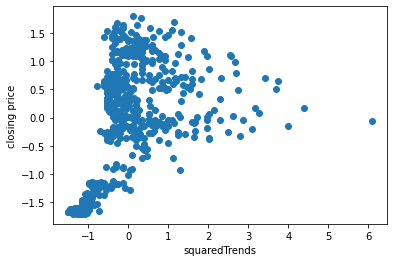

In [25]:
plt.scatter(allBitcoinData["standardized_trends"], allBitcoinData["standardized_price"])
plt.xlabel("squaredTrends")
plt.ylabel("closing price")

In [26]:
quadDiagnostics = ErrorVis.Linear_Reg_Diagnostic(modelQuadratic)

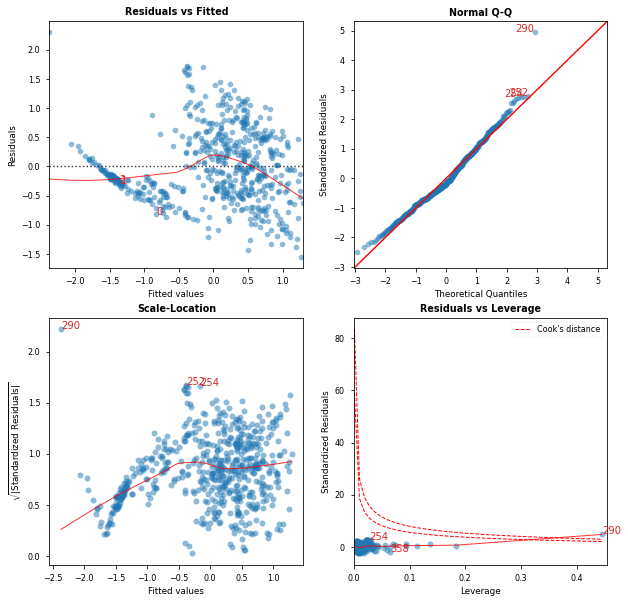

              Features  VIF Factor
4               txnsSq        1.07
1     standardized_txs        1.32
5              postsSq        1.58
2   standardized_posts        2.07
6              trendSq        2.11
3  standardized_trends        2.30
0                const        2.35


(<Figure size 720x720 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot:title={'center':'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot:title={'center':'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot:title={'center':'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>]],
       dtype=object))

In [27]:
quadDiagnostics()

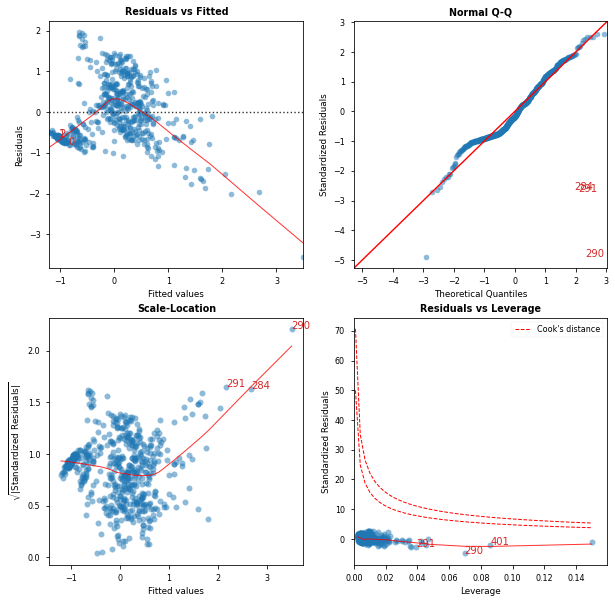

              Features  VIF Factor
0                const        1.00
1     standardized_txs        1.24
4  standardized_trends        1.69
3  standardized_tweets        1.97
2   standardized_posts        2.02


(<Figure size 720x720 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot:title={'center':'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot:title={'center':'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot:title={'center':'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>]],
       dtype=object))

In [28]:
linDiagnostics = ErrorVis.Linear_Reg_Diagnostic(model)
linDiagnostics()

In [29]:
allBitcoinData["smoothedClosingPrice"] = allBitcoinData["Close"].sort_index(ascending=False).ewm(span=2).mean().sort_index(ascending=True)
allBitcoinData["smoothedTrends"] = allBitcoinData["Bitcoin"].ewm(span=2).mean()
allBitcoinData["smoothedPosts"] = allBitcoinData["one"].ewm(span=2).mean()
allBitcoinData["smoothedTxs"] = allBitcoinData["transaction_count"].ewm(span=2).mean()
allBitcoinData["smoothedTweets"] = allBitcoinData["tweet_count"].ewm(span=2).mean()

In [30]:
allBitcoinData[["standardized_smoothTx", "standardized_smoothTwt", "standardized_smoothPost", "standardized_smoothTrends"]] = prep.StandardScaler().fit_transform(allBitcoinData[['smoothedTxs', 'smoothedTweets', 'smoothedPosts', "smoothedTrends"]])
allBitcoinData["standardized_smoothPrice"] = prep.StandardScaler().fit_transform(allBitcoinData[["smoothedClosingPrice"]])
X = sm.add_constant(allBitcoinData[["standardized_txs", "standardized_trends", "standardized_posts", "standardized_tweets"]])
Y = allBitcoinData["standardized_smoothPrice"]

modelSmoothed = sm.OLS(Y, X).fit()
print(modelSmoothed.summary())

NotImplementedError: 

In [ ]:
smoothedDiagnostics = ErrorVis.Linear_Reg_Diagnostic(modelSmoothed)
smoothedDiagnostics()

In [ ]:
allBitcoinData["smoothTxnsSq"] = allBitcoinData["standardized_smoothTx"]*allBitcoinData["standardized_smoothTx"]
allBitcoinData["smoothTrendSq"] = allBitcoinData["standardized_smoothTrends"]*allBitcoinData["standardized_smoothTrends"]
allBitcoinData["smoothPostsSq"] = allBitcoinData["standardized_smoothPost"]*allBitcoinData["standardized_smoothPost"]
allBitcoinData["smoothTwtSq"] = allBitcoinData["standardized_smoothTwt"]*allBitcoinData["standardized_smoothTwt"]
XQuadSmooth = sm.add_constant(allBitcoinData[["standardized_txs", "standardized_posts", "standardized_tweets", "standardized_trends", "standardized_txSq", "standardized_trendSq", "standardized_postsSq", "standardized_tweetsSq"]])
YSmooth = allBitcoinData["standardized_smoothPrice"]
modelQuadSmoothed = sm.OLS(YSmooth, XQuadSmooth).fit(cov_type='HC3')
print(modelQuadSmoothed.summary())

In [ ]:
allBitcoinData["smoothTxnsSq"] = allBitcoinData["standardized_smoothTx"]*allBitcoinData["standardized_smoothTx"]
allBitcoinData["smoothTrendSq"] = allBitcoinData["standardized_smoothTrends"]*allBitcoinData["standardized_smoothTrends"]
allBitcoinData["smoothPostsSq"] = allBitcoinData["standardized_smoothPost"]*allBitcoinData["standardized_smoothPost"]
allBitcoinData["smoothTwtSq"] = allBitcoinData["standardized_smoothTwt"]*allBitcoinData["standardized_smoothTwt"]
XQuadSmoothSplit = sm.add_constant(allBitcoinData[0:548][["standardized_txs", "standardized_posts", "standardized_tweets", "standardized_trends", "standardized_txSq", "standardized_trendSq", "standardized_postsSq", "standardized_tweetsSq"]])
YSmoothSplit = allBitcoinData[0:548]["standardized_smoothPrice"]
modelQuadSmoothedSplit = sm.OLS(YSmoothSplit, XQuadSmoothSplit).fit(cov_type='HC3')
print(modelQuadSmoothedSplit.summary())
XnewTest = sm.add_constant(allBitcoinData[548:][["standardized_txs", "standardized_posts", "standardized_tweets", "standardized_trends", "standardized_txSq", "standardized_trendSq", "standardized_postsSq", "standardized_tweetsSq"]])
YNewPredict = modelQuadSmoothedSplit.predict(XnewTest)
YNewTest = allBitcoinData[548:]["standardized_smoothPrice"]
print(stools.eval_measures.mse(YNewTest, YNewPredict))

In [ ]:
smoothedQuadDiagnostics = ErrorVis.Linear_Reg_Diagnostic(modelQuadSmoothed)
smoothedQuadDiagnostics()

In [ ]:
tranX = sm.add_constant(Transformation.repeated_gs_removal(["standardized_posts", "standardized_tweets", "standardized_trends", 
                                   "standardized_trendSq", "standardized_postsSq", "standardized_tweetsSq"], 
                                   ["standardized_txs", "standardized_txSq"], allBitcoinData))
idx = pd.date_range('2020-08-02', '2022-02-28')
XQuadSmoothNoTx = tranX
XQuadSmoothNoTx.index = idx
Y = allBitcoinData["standardized_price"]



In [ ]:
modelQuadSmoothedNoTx = sm.OLS(YSmooth, XQuadSmoothNoTx).fit()
print(modelQuadSmoothedNoTx.summary())
smoothedQuadDiagnosticsNoTx = ErrorVis.Linear_Reg_Diagnostic(modelQuadSmoothedNoTx)
smoothedQuadDiagnosticsNoTx()


In [ ]:
trendX = sm.add_constant(Transformation.repeated_gs_removal(["standardized_posts", "standardized_tweets", "standardized_txSq", 
                                   "standardized_txs", "standardized_postsSq", "standardized_tweetsSq"], 
                                   ["standardized_trends", "standardized_trendSq"], allBitcoinData))
idx = pd.date_range('2020-08-02', '2022-02-28')
XQuadSmoothNoTrend = trendX
XQuadSmoothNoTrend.index = idx
Y = allBitcoinData["standardized_price"]

In [ ]:
modelQuadSmoothedNoTrend = sm.OLS(YSmooth, XQuadSmoothNoTrend).fit()
print(modelQuadSmoothedNoTrend.summary())
smoothedQuadDiagnosticsNoTrend = ErrorVis.Linear_Reg_Diagnostic(modelQuadSmoothedNoTrend)
smoothedQuadDiagnosticsNoTrend()

In [ ]:
postX = sm.add_constant(Transformation.repeated_gs_removal(["standardized_trends", "standardized_tweets", "standardized_txSq", 
                                   "standardized_txs", "standardized_trendSq", "standardized_tweetsSq"], 
                                   ["standardized_posts", "standardized_postsSq"], allBitcoinData))
idx = pd.date_range('2020-08-02', '2022-02-28')
XQuadSmoothNoPost = postX
XQuadSmoothNoPost.index = idx

In [ ]:
modelQuadSmoothedNoPost = sm.OLS(YSmooth, XQuadSmoothNoPost).fit()
print(modelQuadSmoothedNoPost.summary())
smoothedQuadDiagnosticsNoPost = ErrorVis.Linear_Reg_Diagnostic(modelQuadSmoothedNoPost)
smoothedQuadDiagnosticsNoPost()

In [ ]:
twtX = sm.add_constant(Transformation.repeated_gs_removal(["standardized_trends", "standardized_posts", "standardized_txSq", 
                                   "standardized_txs", "standardized_trendSq", "standardized_postsSq"], 
                                   ["standardized_tweets", "standardized_tweetsSq"], allBitcoinData))
idx = pd.date_range('2020-08-02', '2022-02-28')
XQuadSmoothNoTwt = twtX
XQuadSmoothNoTwt.index = idx

In [ ]:
modelQuadSmoothedNoTwt = sm.OLS(YSmooth, XQuadSmoothNoTwt).fit()
print(modelQuadSmoothedNoTwt.summary())
smoothedQuadDiagnosticsNoTwt = ErrorVis.Linear_Reg_Diagnostic(modelQuadSmoothedNoTwt)
smoothedQuadDiagnosticsNoTwt()

In [ ]:
influence = modelQuadSmoothed.get_influence()
inf_sum = influence.summary_frame()
inf_sum

In [ ]:
xQuadLowLeverage = XQuadSmooth[np.abs(inf_sum["hat_diag"]) > (20/576)]
xQuadNoOutliers = xQuadLowLeverage[np.abs(inf_sum["student_resid"]) > 2.5]
xQuadNoOutliers

In [ ]:
xQuadRemoveBad = XQuadSmooth.loc[set(XQuadSmooth.index) - set(xQuadNoOutliers.index)].sort_index()

In [ ]:
YSmoothRemoveBad = YSmooth.loc[set(YSmooth.index) - set(xQuadNoOutliers.index)].sort_index()

In [ ]:
modelQuadSmoothedNoOutliers = sm.OLS(YSmoothRemoveBad, xQuadRemoveBad).fit(cov_type='HC3')
print(modelQuadSmoothedNoOutliers.summary())

In [ ]:
noOutliersDiag = ErrorVis.Linear_Reg_Diagnostic(modelQuadSmoothedNoOutliers)
noOutliersDiag()

In [ ]:
XQuadRegularized = sm.add_constant(allBitcoinData[["standardized_txs", "standardized_posts", "standardized_tweets", "standardized_trends", "standardized_txSq", "standardized_trendSq", "standardized_postsSq", "standardized_tweetsSq"]])
YRegularized = allBitcoinData["standardized_smoothPrice"]
modelQuadRegularized = sm.OLS(YRegularized, XQuadRegularized).fit_regularized(L1_wt = 0.0)
modelQuadRegularizedResults = sm.regression.linear_model.OLSResults(sm.OLS(YRegularized, XQuadRegularized), modelQuadRegularized.params)
print(modelQuadRegularizedResults.rsquared)

In [ ]:
YRegularized = allBitcoinData["standardized_smoothPrice"]
modelQuadRegularizedNoTx = sm.OLS(YRegularized, XQuadSmoothNoTx).fit_regularized(L1_wt = 0.0)
modelQuadRegularizedNoTxResults = sm.regression.linear_model.OLSResults(sm.OLS(YRegularized, XQuadSmoothNoTx), modelQuadRegularizedNoTx.params)
print(modelQuadRegularizedNoTxResults.rsquared)